In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

This section uses the verlet method for computations. 

The function verlet takes the values x (position), a (acceleration), dt (time step), and num_i (number of iterations to be computed). It was setup as a simple test to see if I was using the verlet method correctly. The graphs of position and velocity with respect to time are plotted. 

The function verlet2 takes the same values as inputs. Here I am attempting to use the verlet method with the harmonic oscillators. The graphs of position and velocity with respect to time are plotted.

In [0]:
def verlet(x,a,dt,num_i):
  #initialize variables
  xold = 0
  time = 0
  v = 0
  k = 1
  m = 1
  omega = np.sqrt(k/m)
  B1 = 1
  B2 = 1
  #create empty arrays of size num_i to be filled 
  Ftime = np.zeros(num_i)
  Fv = np.zeros(num_i)
  Fx = np.zeros(num_i)
  for i in range (0,num_i,1): #A number of iterations from 0 to num_i will be computed at time step intervals dt 
    time = time + dt
    x = x + (v*dt)+(0.5)*a*dt*dt
    v = v + (a*dt)
    Ftime[i] = time
    Fv[i] = v
    Fx[i] = x
  #Create Plots
  plt.figure(0)
  plt.plot(Ftime,Fv)
  plt.xlabel("$t$")
  plt.ylabel("$v(t)$")
  plt.figure(1)
  plt.plot(Ftime,Fx)
  plt.xlabel("$t$")
  plt.ylabel("$x(t)$")
  xold = x
  return

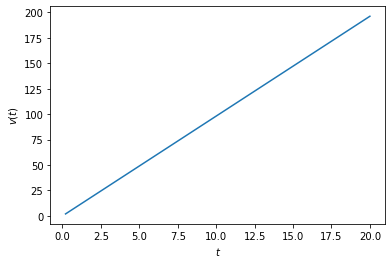

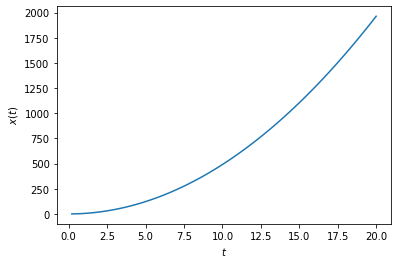

In [0]:
verlet(1,9.81,0.2,100) #Calling verlet functionn with input parameters 

In [0]:
def verlet2(x,a,dt,num_i):
  #Initialize Variables
  xold = 0
  time = 0
  v = 0
  k = 1
  m = 1
  omega = np.sqrt(k/m)
  omega_new = 500
  B1 = 1
  B2 = 1
  #Create empty arrays 
  Ftime = np.zeros(num_i)
  Fv = np.zeros(num_i)
  Fx = np.zeros(num_i)
  Fx2 = np.zeros(num_i)
  for i in range (0,num_i,1): #A number of iterations from 0 to num_i will be computed at time step intervals dt 
    Xt = B1*np.cos(omega * i) + B2*np.sin(omega*i)
    Vt = omega*(B2*np.cos(omega*i) - B1*np.sin(omega*i))
    time = time + dt
    x = Xt + (v*dt)+(0.5)*a*dt*dt
    v = Vt + (a*dt)
    Ftime[i] = time
    Fv[i] = v
    Fx[i] = x
  #Creating Plots 
  plt.figure(0)
  plt.plot(Ftime,Fv) #Plotting the array of time steps vs the array of respective velocities 
  plt.xlabel("$t$")
  plt.ylabel("$v(t)$")
  plt.title("No Damping (Velocity)")
  plt.figure(1)
  plt.plot(Ftime,Fx) #Plotting the array of time steps vs the array of respective positions 
  plt.xlabel("$t$")
  plt.ylabel("$x(t)$")
  plt.title("No Damping (Position)")
  xold = x
  return

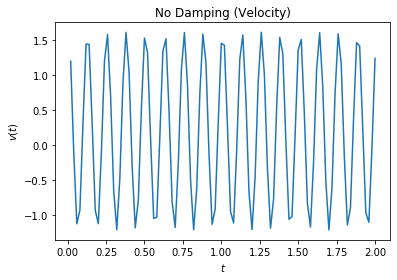

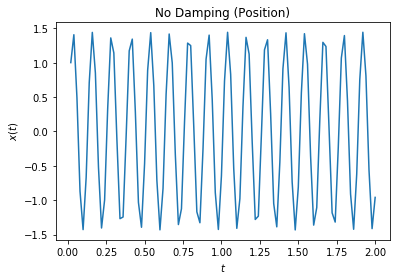

In [220]:
verlet2(1,9.81,0.02,100) #Calling verlet2 functionn with input parameters

The next section of code looks at different levels of dampening

Text(0.5, 1.0, 'Underdamped ($B$ < $\\omega$)')

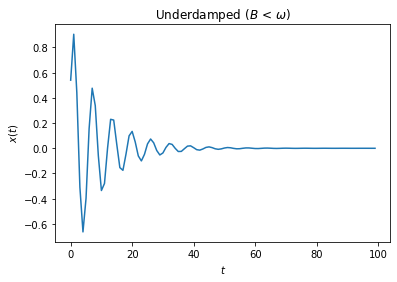

In [34]:
x = np.zeros(100) #An empty array x is created to later be filled with x position values 
y = np.arange(0,100,1) # array y for time values 
#Initialize Variables
k = 1
m = 1
omega = np.sqrt(k/m)
delta = 1
B = 0.1
for i in range (0,100,1): #The value x(t) is computed 100 times. Changing this range will change the time for which x is computed. 
    x[i] = (np.e)**(i*-B) * np.cos(omega * i - delta)
#print(x) 
#print(y)
plt.plot(y,x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.title("Underdamped ($B$ < $\omega$)")

Text(0.5, 1.0, 'Overdamped ($B$ > $\\omega$)')

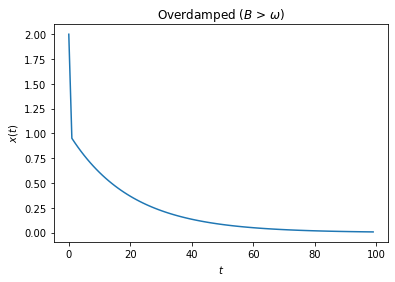

In [0]:
B = 10 #Decay parameter 
C1 = 1
C2 = 1
decay1 = B - np.sqrt(B**2 - omega**2)
decay2 = B + np.sqrt(B**2 - omega**2)
for i in range (0,100,1):
    x[i] = C1*(np.e)**(-(decay1)*i) + C2*(np.e)**(-(decay2)*i)
plt.plot(y,x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.title("Overdamped ($B$ > $\omega$)")
#print(x)
#print(y)


Text(0.5, 1.0, 'Critical Damping ($B$ = $\\omega$)')

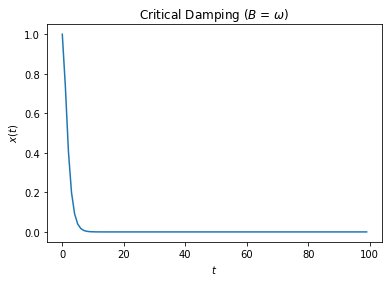

In [0]:
B=1
C1=1
C2=1
for i in range (0,100,1):
    x[i] = C1*(np.e)**(-B*i) + C2*i*(np.e)**(-B*i)

plt.plot(y,x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.title("Critical Damping ($B$ = $\omega$)")
#print(x)
#print(y)

Below is my initial attempt of creating a driven oscillator. It became too complicated and was giving me many errors and unusual results. I threw out this method and attemped another approach in the following section

Text(0, 0.5, '$x(t)$')

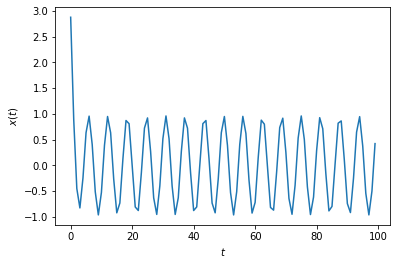

In [217]:
z = np.arange(0,100,1) # array y for time values 
A2 = np.zeros(100)
x2 = np.zeros(100)
omega_d = .2  # driving frequency 
C1 = 1
C2 = 1
omega = 1
B = 1
A = np.sqrt(1/((omega**2 - omega_d**2)**2 + 4*(B**2)*((omega_d)**2)))
decay1 = -B - np.sqrt(B**2 - omega**2)
decay2 = -B + np.sqrt(B**2 - omega**2)
delta = ((2*decay1*omega_d)/(omega**2 - omega_d**2))


for i in range(0,100,1):
    x2[i] = A*np.cos(omega*i - delta) + C1*(np.e)**(decay1*i) + C2*(np.e)**(decay1*i)

plt.plot(z,x2)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")

This section below is my much simpler attemt at plotting a driven oscillator. I am pretty new at python and as I was troubleshooting the previous section, learned about the .append function. This makes using the verlet algorithm much easier as values of Xold can be added to Xnew very easily. I wish I would have known about this function sooner but im glad I found it! 

The value of B can be changed to look at different damping values. 
w is the driving frequency 

Text(0, 0.5, '$x(t)$')

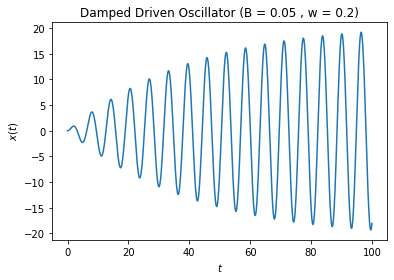

In [248]:
#Initialize variables 
k = 1
m = 1
B = 0.05 # damping parameter
F = 1.0
w0 = np.sqrt(k/m) # omega

w = 0.99 * w0 #w is the driving frequency 
num_i = 100 #number of iterations 
dt = 0.01
t = 0 
x = 0
v = 0
a = 0

def force(x, v, t):     #function created to compute the force of the system with added driving force 
    return -B*v - k*x + F*np.cos(w*t)

X = [0.] #Here, 3 arrays are created for Xnew, time, and force. They will later be filled with the .apend function 
T = [0.] 
FF = [1.]

while t<num_i: #This is the verlet loop. each iteration calculates a new force, acc, position, and velocity. Each new value added to the previous array. 
    f = force(x,v, t)
    a = f / m
    x = x + v * dt + 0.5*a *dt*dt
    v = v + a * dt
    t = t + dt
    X.append(x)
    T.append(t)

plt.figure() #create plot (time vs position)
plt.plot(T,X)
plt.title("Damped Driven Oscillator (B = 0.05 , w = 0.2)")
plt.xlabel('$t$')
plt.ylabel('$x(t)$')